#**What Makes The World Happy?**
#Tutorial: Analysis of World Happiness Report
James Campbell <br>
CMSC320<br>
Professor Morawski<br>
16 December 2022

#1. Introduction
The world is often a mysterious place. The way in which people conduct themselves is often out of necessity. This begs the question, "what makes a person happy?"<br>
The World Happiness Report has been attempting to figure this out for many years. The report polls people in every country and asks them basic yes or no questions on their overall happiness.<br>
In this tutorial, we will analyze the data from the [World Happiness Report from 2021](https://worldhappiness.report/ed/2021/) and start to come to our own conclusions about what drives happiness in the world.<br>
We will begin by loading the data and making sure it is clean before proceeding into deeper analysis using machine learning. By using this data, one should be able to get a better understanding of what makes a person happy within their country.



#2. Data Wrangling
We will start by importing a few libraries. 


*   [numpy](https://numpy.org/): Package that allows for a large amount of different mathematical operations on data
*   [pandas](https://pandas.pydata.org/): Package that builds dataframes and allows us to easily parse throgh files


In [32]:
import numpy as np
import pandas as pd

###2.1 Pulling Data
We will start by pulling data from the comma-separated values file that I have taken from the World Happiness Report's website. Pandas allows us to use read_csv to convert the data into a dataframe. We can then look through the columns to find which ones are going to be useful to us.

In [2]:
df = pd.read_csv('2021.csv')
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

Next, we can sort the values by country and remove all the columns that are not useful to us. I then check if there are any null values in the data frame. Luckily, there are no null values.

In [3]:
df = df.sort_values(by=['Country name'])
df = df[['Country name', 'Ladder score',
         'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
         'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Regional indicator', 'Standard error of ladder score']]
df.isnull().sum()

Country name                      0
Ladder score                      0
Logged GDP per capita             0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
Regional indicator                0
Standard error of ladder score    0
dtype: int64

As one can see, there are a number of categories that the world happiness data shows.

Ladder Score: Participants envision a ladder with a 10 being at the top and 0 at the bottom. They then rank their life on that ladder with 10 being the best possible life and 0 being the worst possible life.

Logged GDP per Capita: GDP in terms of purchasing power parity (essentially tries to equate all currencies to one another). It then gets the natural log of GDP per capita.

Social Support: Average of responses either yes or no to the question that asks “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

Freedom to Make Life Choices: Average of responses either yes or no to the question that asks “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

Generosity: Answers the question “Have you donated money to a charity in the past month?” and regresses it on log GDP per capita.

Perceptions of Corruption: Average of responses either yes or no to the two questions that ask “Is corruption widespread throughout the government in this country or not?” and “Is corruption widespread within businesses in this country or not?”

#3. Data analysis
First, I will import some packages (seaborn, plotly.express, matplotlib.pyplot). Each of these packagesallows for statistical data visualization.

In [4]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In these first visualizations, we are simply trying to see regions of the world in each category and looking for basic trends between the 7 plots. I used seaborn here to display a univariate distribution by region. We can also remove the various columns that we do not want displayed as shown with df.loc. plt.axvline just finds the mean of all regions and plots it, so we can get a better picture of where each region stands compared to each other and the mean.

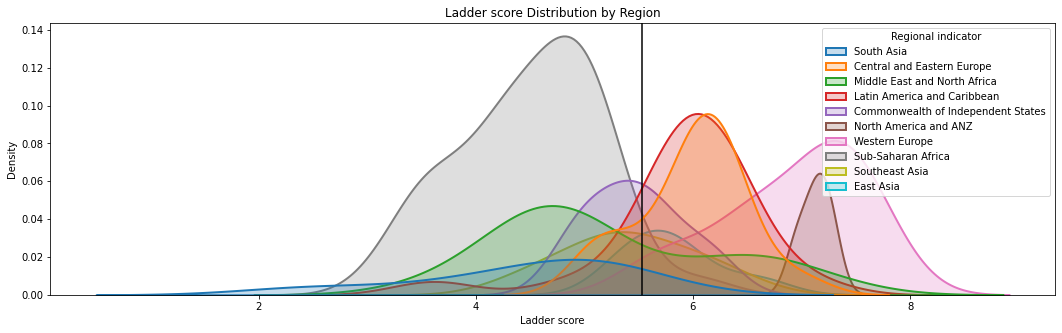

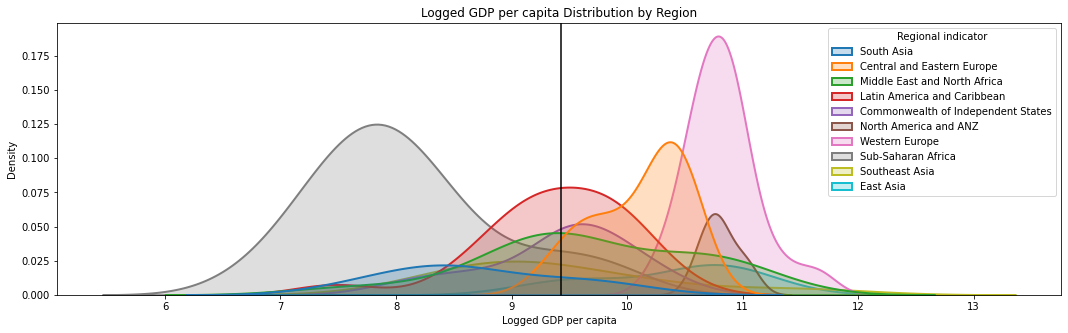

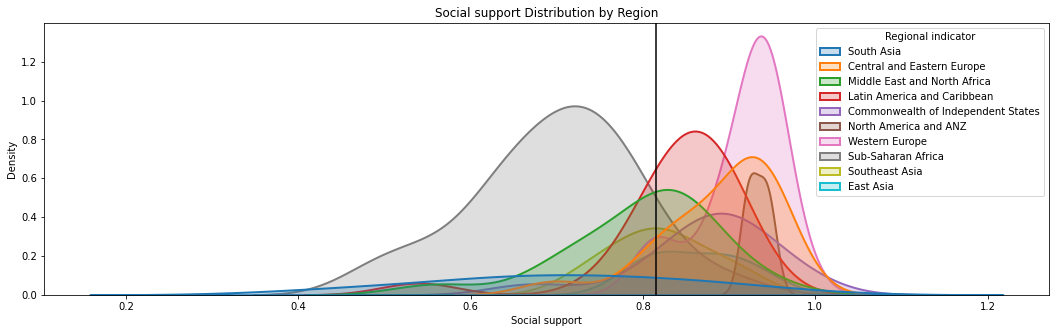

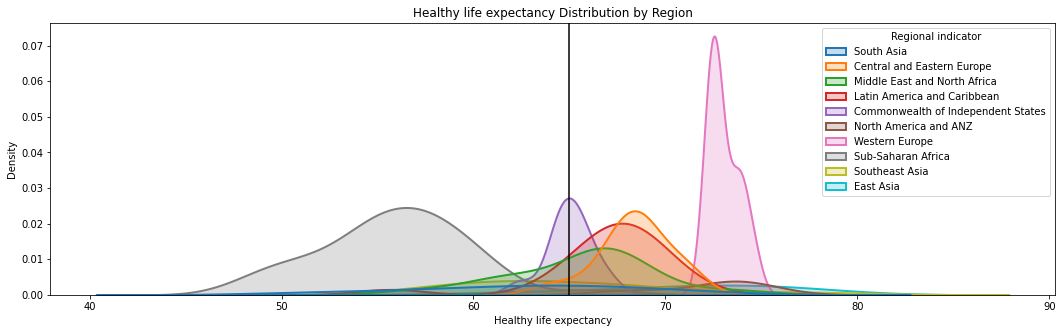

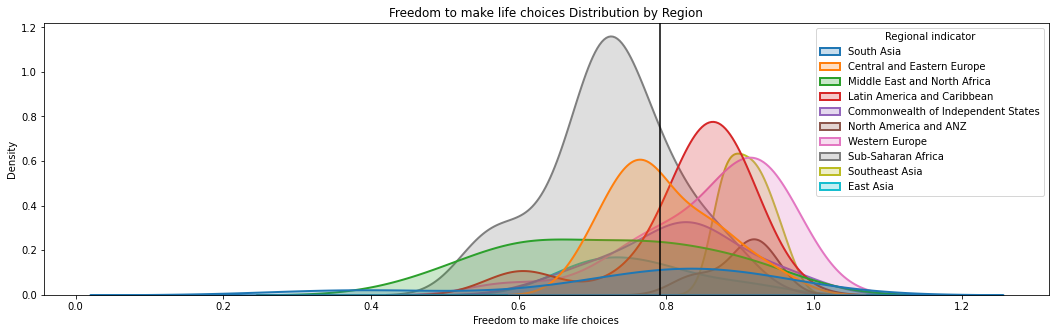

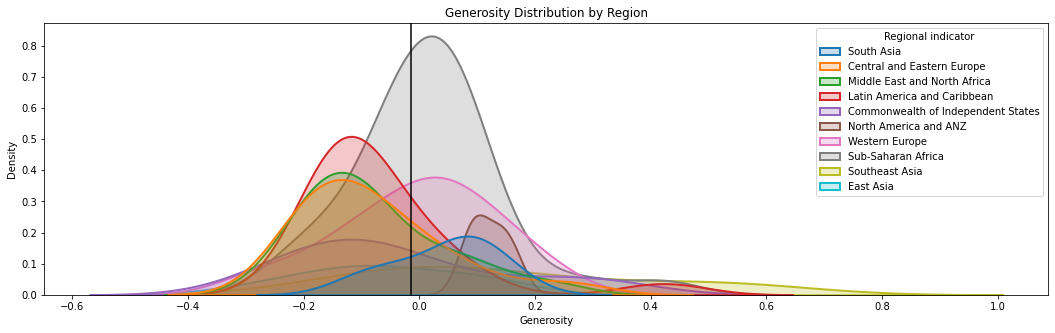

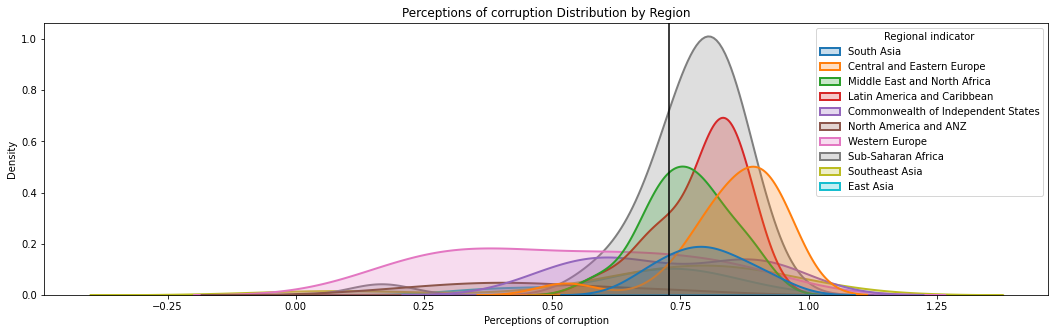

In [5]:
#removes certain unneded columns
cols = df.loc[:, df.columns != 'Country name']
cols = cols.loc[:, cols.columns != 'Regional indicator']
cols = cols.loc[:, cols.columns != 'Standard error of ladder score']

#combines all countries in a region and plots a kernel distribution estimation plot for each region
for col in cols:
  plt.figure(figsize=(18, 5))
  sns.kdeplot(df[col], hue=df["Regional indicator"], fill=True, linewidth=2)
  plt.axvline(df[col].mean(), c="black")
  plt.title(col + " Distribution by Region")
  plt.show()

From these graphs, we can start to see patterns between certain features such as ladder score, logged gdp and  social support. This is shown because the regions that tend to be above the mean tend to be above the mean for all three and those below tend to stay below. <br><br>
Along with the ability to compare regions, this distribution gives a great way for one to see where each region stands in each feature.

We will now check correlation by country. This will further allow us to see each category and their correlations to one another, but on a world map. To do this, we will use plotly.express because it has built in data of each country's location.

In [30]:
#imported only to get graphs to show up on html
import plotly.io as pio
pio.renderers.default='notebook'
#creates choropleth for each category with all countries included
for col in cols:
  fig = px.choropleth(
      df,
      locations = "Country name",
      color = col,
      locationmode = "country names",
  )
  #titling
  fig.update_layout(title = col + " Comparison by Country")
  fig.show()

From these plots, we can further see the correlations from a less generalized lens. It confirms many of the conclusions we came to above. However, one can now see some of the outliers within a region. For example, Saudi Arabia is higher on the ladder score despite being in a region with lower scores.

###3.1 Multivariate Analysis
Each of the previous visualizations was taking the columns individually. If we start to take columns together, we can start to see more concrete correlations between them.<br>
We will start with a basic correlation heatmap to show the correlations between each of the categories.

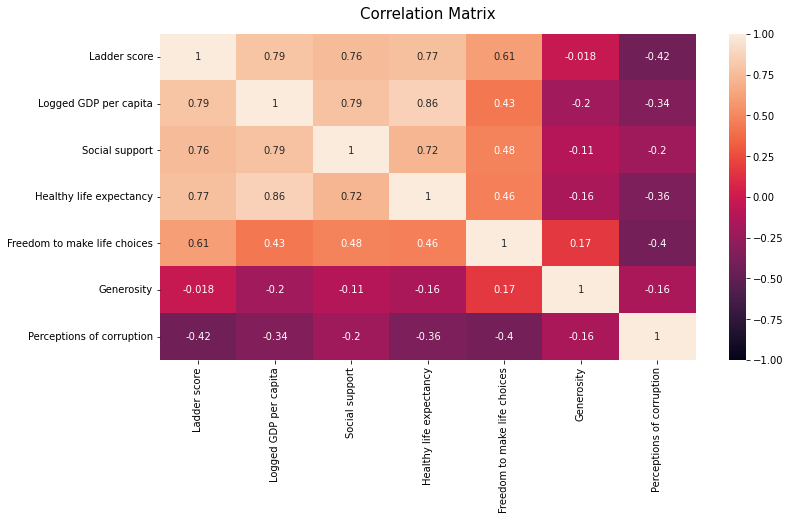

In [7]:
plt.figure(figsize=(12, 6))
matrix = sns.heatmap(cols.corr(), vmin=-1, vmax=1, annot=True) # uses seaborn to create a heat map of the correlation matrix defined by cols.corr()
matrix.set_title('Correlation Matrix', fontdict={'fontsize':15}, pad=15);

From this matrix, we can see many things. First, we can see the highest correlations in the matrix: Logged GDP to Ladder Score and Social Support to Logged GDP per capita. We can also see the highest negative correlation: Perceptions of corruption to ladder score and Freedom to Make Life Choices to Perception of Courruption.<br>

When one thinks about it, these correlations make a lot of sense. This does not mean we can disreguard a lot of the other correlations though. For example, Ladder Score also has a high correlation with Social Support and Healthy Life Expectancy.<br>
Using seaborn, we will dive more into these relationships by creating a regplot. This will allow us to see a linear regression along with our plotted points.

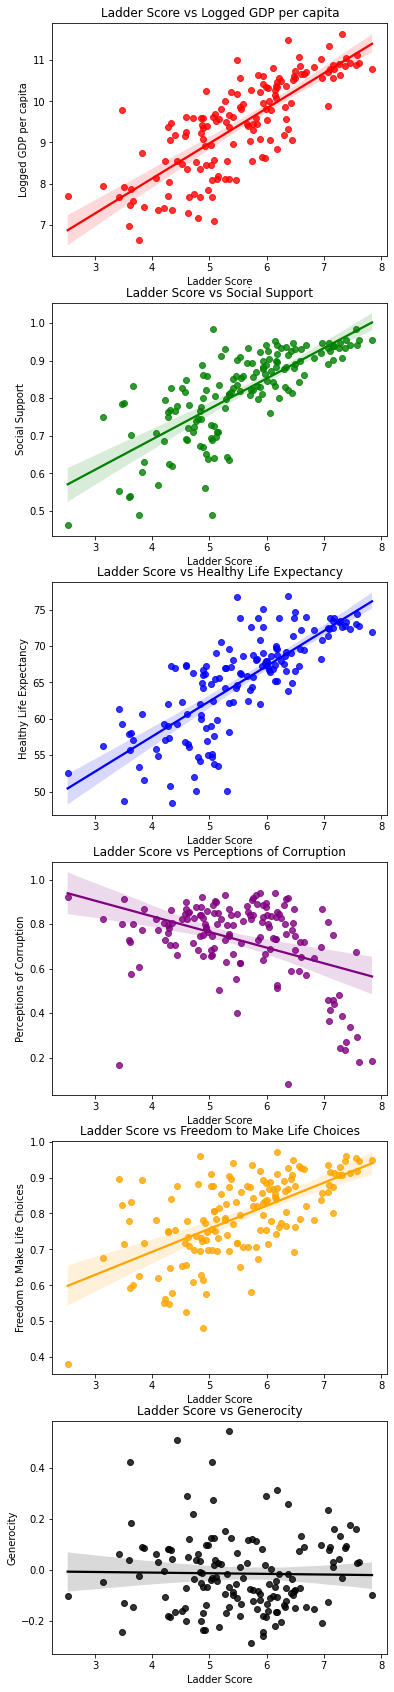

In [8]:
fig, axes = plt.subplots(6, 1, figsize=(6, 30))
#use seaborn to plot ladder score vs ___
_ = sns.regplot(x="Ladder score", y="Logged GDP per capita", data=cols, ax=axes[0], color = "red") 
#labeling
_ = axes[0].set_xlabel("Ladder Score") 
_ = axes[0].set_ylabel("Logged GDP per capita")
_ = axes[0].set_title("Ladder Score vs Logged GDP per capita")

_ = sns.regplot(x="Ladder score", y="Social support", data=cols, ax=axes[1], color = "green")
_ = axes[1].set_xlabel("Ladder Score")
_ = axes[1].set_ylabel("Social Support")
_ = axes[1].set_title("Ladder Score vs Social Support")

_ = sns.regplot(x="Ladder score", y="Healthy life expectancy", data=cols, ax=axes[2], color = "blue")
_ = axes[2].set_xlabel("Ladder Score")
_ = axes[2].set_ylabel("Healthy Life Expectancy")
_ = axes[2].set_title("Ladder Score vs Healthy Life Expectancy")

_ = sns.regplot(x="Ladder score", y="Perceptions of corruption", data=cols, ax=axes[3], color = "purple")
_ = axes[3].set_xlabel("Ladder Score")
_ = axes[3].set_ylabel("Perceptions of Corruption")
_ = axes[3].set_title("Ladder Score vs Perceptions of Corruption")

_ = sns.regplot(x="Ladder score", y="Freedom to make life choices", data=cols, ax=axes[4], color = "orange")
_ = axes[4].set_xlabel("Ladder Score")
_ = axes[4].set_ylabel("Freedom to Make Life Choices")
_ = axes[4].set_title("Ladder Score vs Freedom to Make Life Choices")

_ = sns.regplot(x="Ladder score", y="Generosity", data=cols, ax=axes[5], color = "black")
_ = axes[5].set_xlabel("Ladder Score")
_ = axes[5].set_ylabel("Generocity")
_ = axes[5].set_title("Ladder Score vs Generocity")

Because ladder score is people's own thoughts on how happy they are, it is not suprising that countries with higher gdp per capita are happier. One interesting thing on these graphs is people's perception of corruption in government. Most government seem to be perceived as quite corrupt no matter where you live. There also seems to be almost no correlation between generosity and ladder score.

Now lets take a look at correlations between categories that are not ladder score.

Text(0.5, 1.0, 'Perceptions of Corruption vs Freedom to Make Life Choices')

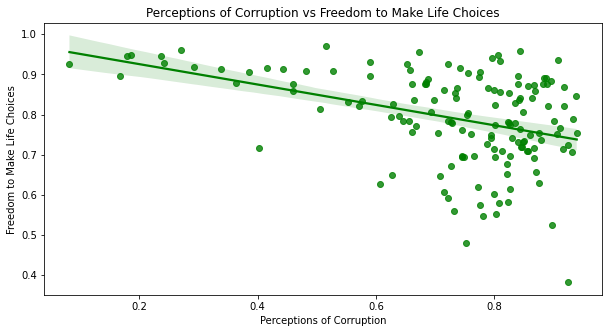

In [9]:
plt.figure(figsize=(10, 5))
sns.regplot(x="Perceptions of corruption", y="Freedom to make life choices", data=cols, color = "green")
plt.xlabel("Perceptions of Corruption")
plt.ylabel("Freedom to Make Life Choices")
plt.title("Perceptions of Corruption vs Freedom to Make Life Choices")

The correlation is as to be expected. However, it seems that many people feel that they can have freedom despite a corrupt governmental body.

Text(0.5, 1.0, 'Healthy Life Expectancy vs Logged GDP Per Capita')

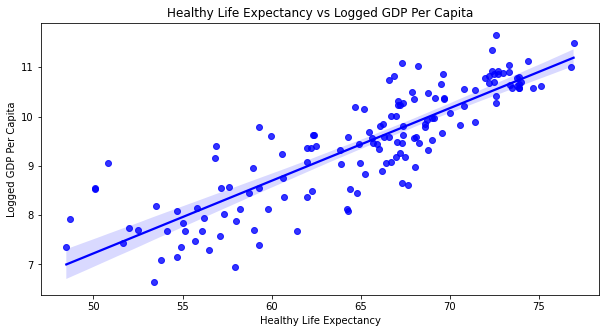

In [10]:
plt.figure(figsize=(10, 5))
sns.regplot(x="Healthy life expectancy", y="Logged GDP per capita", data=cols, color = "blue")
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Logged GDP Per Capita")
plt.title("Healthy Life Expectancy vs Logged GDP Per Capita")

These two categories had the highest correlation which also makes a lot of sense logically due to the nature of how money works in correlation with health in the world.

#4. Hypothesis Testing
To start hypothesis testing, we are going to need a couple of things. First, we will need the [statsmodels](https://www.statsmodels.org/dev/api.html) package. This will allow us to run some statistical analysis on the data at hand.

In [11]:
import statsmodels.api as sm

###4.1 Testing Logged GDP Per Capita and Ladder Score
First, we want to test the hypothesis that a higher logged GDP results in a higher ladder score. This is because we want to determine if the relationship of wealth in a country to happiness is statistically significant.<br>
To do this, we need to set our null and alternative hypotheses. The null hypothesis will be that the coefficient of the linear model is 0.


In [12]:
X = cols[['Logged GDP per capita']].values
X = sm.add_constant(X)
y = cols['Ladder score'].values

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           5.23e-33
Time:                        00:15:27   Log-Likelihood:                -148.73
No. Observations:                 149   AIC:                             301.5
Df Residuals:                     147   BIC:                             307.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3719      0.446     -3.079      0.002      -2.253      -0.491
x1             0.7320      0.047     15.610      0.000       0.639       0.825
==============================================================================
Omnibus:                        3.978   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.644
Skew:                          -0.379   Prob(JB):                        0.162
Kurtosis:                       3.109   Cond. No.                         79.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

At significance level α=0.01, we can reject the null hypothesis as our P value here rounds to 0.000. We also have a high R squared value here at about 62% meaning that about 62% of variation can be attributed to logged GDP Per Capita.

###4.2 Freedom To Make Life Choices and Generocity
One would think that generocity is correlated to each of the other traits. However, it is unclear, so we will test whether generocity has a relationship to the freedom to make life choices in any way. Potentially people who are more generous have more freedom to make life choices.<br>
In this test, we need to set our null and alternative hypotheses again. We will use the same model and test whether or not there is significant evidence that the coefficient of the linear model between the two is different from 0.

In [13]:
X = cols[['Freedom to make life choices']].values
X = sm.add_constant(X)
y = cols['Generosity'].values

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.345
Date:                Sat, 17 Dec 2022   Prob (F-statistic):             0.0388
Time:                        00:15:27   Log-Likelihood:                 73.270
No. Observations:                 149   AIC:                            -142.5
Df Residuals:                     147   BIC:                            -136.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1934      0.086     -2.239      0.027      -0.364      -0.023
x1             0.2252      0.108      2.084      0.039       0.012       0.439
==============================================================================
Omnibus:                       28.934   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.356
Skew:                           1.011   Prob(JB):                     3.85e-10
Kurtosis:                       4.701   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

At significance α = 0.01, we cannot reject the null hypothesis. This is furthered by a low R squared value meaning that the model is not a very good explanation of our data.

###4.3 Perceptions of Corruption and Social Support
As shown by our graphs previously, perceptions of corruption are somewhat skewed to percieving governments as corrupted. It will be interesting to see the correlation of corruption and someones ability to call for help within their society. <br>
In this test, we need to set our null and alternative hypotheses again. We will use the same model and test whether or not there is significant evidence that the coefficient of the linear model between the two is different from 0.


In [14]:
X = cols[['Perceptions of corruption']].values
X = sm.add_constant(X)
y = cols['Social support'].values

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     6.332
Date:                Sat, 17 Dec 2022   Prob (F-statistic):             0.0129
Time:                        00:15:27   Log-Likelihood:                 114.63
No. Observations:                 149   AIC:                            -225.3
Df Residuals:                     147   BIC:                            -219.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9095      0.039     23.455      0.000       0.833       0.986
x1            -0.1303      0.052     -2.516      0.013      -0.233      -0.028
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.220
Skew:                          -1.067   Prob(JB):                     1.01e-07
Kurtosis:                       3.796   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

At significance level α=0.01, we cannot reject the null hypothesis. This is quite interesting as one would think that there would be a higher correlation between people feeling safe in their society and how they perceive their government.

#5. Classification 
Because there are some strong relationships in our data, we will now try to determine what makes a society "happy" with machine learning that shold be able to classify whether or not a society is "happy".<br>
We will use the predefined categorical variables as a starting point for our classification task.<br>
To perform our classification, we will import a classifier and functions associated with it from the [sklearn](https://scikit-learn.org/stable/) package. 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score

For a classifier of happiness, we are going to use if a country has over average ladder score they are happy, and they are otherwise sad. To achieve this, we first need to make a new column that has true for happy and false for sad.

In [16]:
y = np.where(df['Ladder score'] > df['Ladder score'].mean(), True, False)

We will then determine the best training values for our K Nearest Neighbors classification to work effectively.

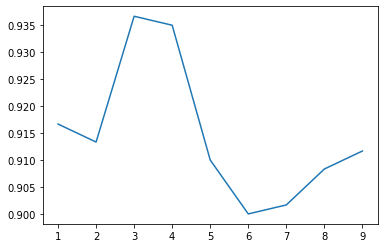

In [17]:
X = cols.values

training_accuracy = []
accuracy = []

setting = range(1,10)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=50)
# Using cross validation to tune parameters 
for neigh in setting:
    knn = KNeighborsClassifier(n_neighbors=neigh)
    kFoldAccuracy = []
    for train, test in KFold(n_splits=20).split(X_train):
        knn.fit(X_train[train],y_train[train])
        kFoldAccuracy.append(knn.score(X_train[test], y_train[test]))
    accuracy.append(np.mean(kFoldAccuracy))

plt.plot(range(1,10), accuracy)

In [18]:
#choosing best score
best = KNeighborsClassifier(n_neighbors=3)
best.fit(X_train,y_train)
#Accuracy over 20 trials
scores = cross_val_score(best, X, y, cv=20)
print(scores.mean())

0.9455357142857144


As a result, we have come to about 94.55% accuracy.

#Conclusion
To reach this point, we have gone through the standard data science pipeline. We obtained the data, cleaned it for use, made visualizations about the data, modeled the data against one another, interpreted it through various methods including machiene learning, and we are now drawing conclusions. From the data and the methods conducted today, we have learned many new things about what makes people happy. We have seen the strong correlation between happiness and GDP per capita as well as factors that seem to not affect happiness such as generocity of the people within a country. If the data is ever released, it may be interesting to see these affects on a person by person basis in addition to countries and regions as a whole.